# Boot

In [1]:
!pip install -U git+https://github.com/AndressaStefany/evolving_systems

  Cloning https://github.com/AndressaStefany/evolving_systems to /tmp/pip-req-build-w10l4cb_
  Running command git clone -q https://github.com/AndressaStefany/evolving_systems /tmp/pip-req-build-w10l4cb_
  Created wheel for evolvingsystems: filename=evolvingsystems-0.1-cp36-none-any.whl size=18788 sha256=a70f9d2c3bc7f925b7c88ff00044cfd452a90a18d111e0e7f2dfa828bdde090d
  Stored in directory: /tmp/pip-ephem-wheel-cache-vm8f2axw/wheels/e1/8c/20/90c8f2bc1d2adcfff98088c8773e120d9890220001e2cc7962
Successfully built evolvingsystems


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from algoritms.sostream.SOStream import SOStream
from algoritms.sostream.SOStream_with_feedback import SOStream_feedback
from metrics.Metrics import purity, silhouette, adjusted_rand, precision, recall, f1

# Data

In [4]:
!wget https://raw.githubusercontent.com/deric/clustering-benchmark/master/src/main/resources/datasets/artificial/s-set1.arff

--2020-07-11 18:32:00--  https://raw.githubusercontent.com/deric/clustering-benchmark/master/src/main/resources/datasets/artificial/s-set1.arff
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102051 (100K) [text/plain]
Saving to: ‘s-set1.arff’

s-set1.arff         100%[===================>]  99.66K  --.-KB/s    in 0.04s   

2020-07-11 18:32:00 (2.55 MB/s) - ‘s-set1.arff’ saved [102051/102051]



In [5]:
from scipy.io import arff

data = arff.loadarff('s-set1.arff')
df = pd.DataFrame(data[0])
df.CLASS = df.CLASS.astype(int)

df.head()

,x,y,CLASS
0,664159.0,550946.0,14
1,665845.0,557965.0,14
2,597173.0,575538.0,14
3,618600.0,551446.0,14
4,635690.0,608046.0,14


In [6]:
X = df.drop(['CLASS'],axis=1)
y = df['CLASS']

# SOStream

In [6]:
sostream = SOStream(alpha = 0, min_pts = 3, merge_threshold = 59900)

for r in X.values:
    sostream.process(r)

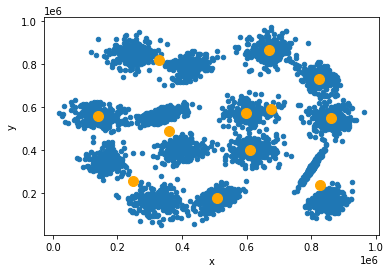

In [7]:
s1_centroids = np.array([c.centroid for c in sostream.M[-1]])

X.plot.scatter(x=0,y=1)
plt.scatter(s1_centroids[:,0], s1_centroids[:,1], color='orange',s=100)

plt.show()

# SOStream with feedback

In [8]:
# standardization
# standardized_X = preprocessing.scale(X.values)
# minmaxscaler = preprocessing.MinMaxScaler()
# minmaxscaler.fit(standardized_X)
# X = minmaxscaler.transform(standardized_X)

In [9]:
X.values

array([[664159., 550946.],
       [665845., 557965.],
       [597173., 575538.],
       ...,
       [650661., 861267.],
       [599647., 858702.],
       [684091., 842566.]])

In [7]:
sostream_f = SOStream_feedback(alpha = 0, min_pts = 3, merge_threshold = 59900)
sostream_f.fit_predict(X.values)

In [8]:
df_y_pred = pd.DataFrame(sostream_f.feedback, columns = ['x', 'y'])
df_y_pred['x+y'] = df_y_pred['x'].astype(str)+'_'+df_y_pred['y'].astype(str)

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()

df_y_pred['CLASS'] = labelencoder_X.fit_transform(df_y_pred.values[:, 2])
df_y_pred = df_y_pred.drop(columns=['x+y'])
y_pred = df_y_pred['CLASS']

In [9]:
print(y_pred.unique())
print(y.unique())

[ 5  8  6 10  2  9  3  1  0  4 11  7]
[14 13  3  6  1  5  4 15  8  9  7 12  0 10 11]


In [10]:
# calculations take into account the class number
y_pred_copy = y_pred.copy()
y_pred_copy = y_pred_copy.replace(5, 14)
y_pred_copy = y_pred_copy.replace(8, 13)
y_pred_copy = y_pred_copy.replace(7, 12)
y_pred_copy = y_pred_copy.replace(0, 8)
y_pred_copy = y_pred_copy.replace(9, 5)
y_pred_copy = y_pred_copy.replace(11, 7)
y_pred_copy = y_pred_copy.replace(4, 9)
y_pred_copy = y_pred_copy.replace(3, 4)
y_pred_copy = y_pred_copy.replace(6, 3)
y_pred_copy = y_pred_copy.replace(10, 6)
y_pred_copy = y_pred_copy.replace(1, 15)
y_pred_copy = y_pred_copy.replace(2, 1)

In [12]:
print("Silhouette Coefficient: %10.4f" % (silhouette(X.values, y_pred)))
print("Adjusted Rand index: %10.4f" % (adjusted_rand(y, y_pred)))
print("Purity: %10.4f" % (purity(y, y_pred)))
print("Precision: %10.4f" % (precision(y, y_pred_copy)))
print("Recall: %10.4f" % (recall(y, y_pred_copy)))
print("F1-Score: %10.4f" % (f1(y, y_pred_copy)))

Silhouette Coefficient:     0.5474
Adjusted Rand index:     0.7385
Purity:     0.7282
Precision:     0.1804
Recall:     0.1804
F1-Score:     0.1804
